In [45]:
#import relevant packages
import pandas as pd
import numpy as np 
import matplotlib
from matplotlib import pyplot as plt
import statistics
import scipy.stats
from scipy.stats import norm
import seaborn as sns

In [167]:
col_list = ["ham_a", "sitting"]
df = pd.read_csv("mtl.csv", usecols=col_list)#importing two specfic columns from dataset 
df.head(10) #display the first 10 rows of the dataset

,ham_a,sitting
0,9,10
1,4,11
2,0,5
3,9,7
4,1,3
5,0,5
6,12,4
7,7,6
8,4,7
9,4,10


In [189]:
# the function shows the statistical summary of the high_anxiety and low_anxiety groups
def descritpive_stats(data):

    # retrieve dataset for high ham_a and low ham_a sitting duration
    sitting_high_anxiety = data[data["ham_a"] >= 4]["sitting"] # high_anxiety group
    sitting_low_anxiety = data[data["ham_a"] < 4]["sitting"]  # low_anxiety group
    
    # calculates high_anxiety group and low_anxiety group means
    sitting_high_anxiety_mean = statistics.mean(sitting_high_anxiety)
    sitting_low_anxiety_mean = statistics.mean(sitting_low_anxiety)
    
    # calculates high_anxiety group and low_anxiety group stdev
    sitting_high_anxiety_stdev = statistics.stdev(sitting_high_anxiety)
    sitting_low_anxiety_stdev = statistics.stdev(sitting_low_anxiety)
    
    # calculates high_anxiety group and low_anxiety group median
    sitting_high_anxiety_median = statistics.median(sitting_high_anxiety)
    sitting_low_anxiety_median = statistics.median(sitting_low_anxiety)
    
    # calculates high_anxiety group and low_anxiety group mode
    sitting_high_anxiety_mode = statistics.mode(sitting_high_anxiety)
    sitting_low_anxiety_mode = statistics.mode(sitting_low_anxiety)
    
    # calculates high_anxiety group and low_anxiety group range
    sitting_high_anxiety_range = max(sitting_high_anxiety) - min(sitting_high_anxiety)
    sitting_low_anxiety_range = max(sitting_low_anxiety) - min(sitting_low_anxiety)
    
    print("\t High Anxiety \t Low Anxiety")
    print("sample: ", (len(sitting_high_anxiety)), "\t\t", (len(sitting_low_anxiety)))
    print("mean:   ", round(sitting_high_anxiety_mean,2), "\t\t", round(sitting_low_anxiety_mean,2))
    print("stdev:  ", round(sitting_high_anxiety_stdev,2), "\t\t", round(sitting_low_anxiety_stdev,2))
    print("median: ", round(sitting_high_anxiety_median,2), "\t\t", round(sitting_low_anxiety_median,2))
    print("mode:   ", sitting_high_anxiety_mode, "\t\t", sitting_low_anxiety_mode)
    print("range:  ", sitting_high_anxiety_range, "\t\t", sitting_low_anxiety_range)
    
descritpive_stats(df)

	 High Anxiety 	 Low Anxiety
sample:  17 		 16
mean:    7.06 		 7
stdev:   2.93 		 3.78
median:  7 		 6.5
mode:    10 		 5
range:   10 		 13


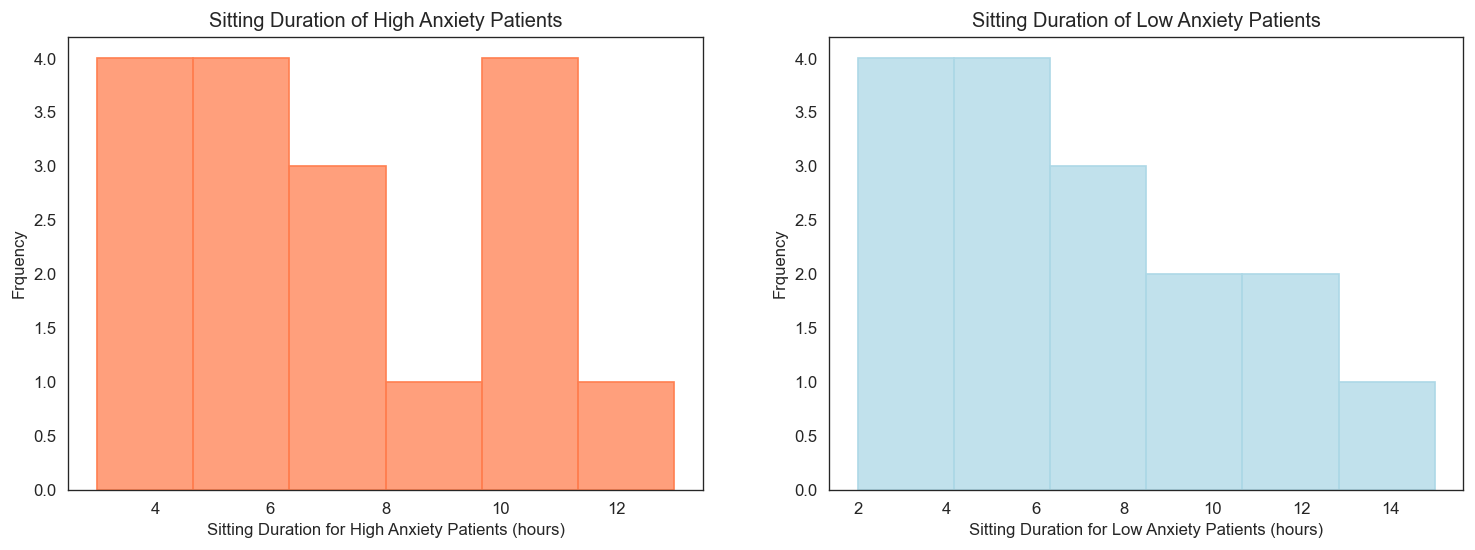

In [113]:
# this plots the histograms to see distributions of the samples of high_anxiety and low_anxiety groups
def histogram_plot(data):
    
    # retrieve dataset for high ham_a and low ham_a sitting duration
    sitting_high_anxiety = data[data["ham_a"] >= 4]["sitting"] # high_anxiety group
    sitting_low_anxiety = data[data["ham_a"] < 4]["sitting"]  # low_anxiety group
    
    # This plots the histograms parallel to each other
    fig, axs, = plt.subplots(1,2, figsize = (15, 5), dpi = 120)
    
    # This plots histogram for high_anxiety and low_anxiety groups
    plt1 = sns.histplot(sitting_high_anxiety, bins = 6,
                       edgecolor = "coral", color = "coral", ax=axs[0])
    plt2 = sns.histplot(sitting_low_anxiety, bins = 6,
                       edgecolor = "lightblue", color = "lightblue", ax=axs[1])
    
    # titles of axes and plots
    plt1.set(xlabel = "Sitting Duration for High Anxiety Patients (hours)", ylabel = "Frquency")
    plt2.set(xlabel = "Sitting Duration for Low Anxiety Patients (hours)", ylabel = "Frquency")

    plt1.title.set_text('Sitting Duration of High Anxiety Patients')
    plt.title('Sitting Duration of Low Anxiety Patients')

    plt.show()
    
histogram_plot(df)

# Hypothesis Test

In [193]:
# the function calculates p-vaue using a t-distribution and a difference of means test
def p_value(data):
    
    # retrieve dataset for high ham_a and low ham_a sitting duration
    sitting_high_anxiety = data[data["ham_a"] >= 4]["sitting"] # high_anxiety group
    sitting_low_anxiety = data[data["ham_a"] < 4]["sitting"]  # low_anxiety group
    
    # calculates high_anxiety group and low_anxiety group means
    high_anxiety_mean = statistics.mean(sitting_high_anxiety)
    low_anxiety_mean = statistics.mean(sitting_low_anxiety)
    
# assign values

    alpha = 0.05
    
    # sample size of subgroups
    n1 = len(sitting_high_anxiety)
    n2 = len(sitting_low_anxiety)
    
    # sample mean of each subgroup
    x1 = high_anxiety_mean
    x2 = low_anxiety_mean
    
    # sample stdev for each subgroup
    s1 = np.std(sitting_high_anxiety, ddof = 1) #ddof = 1 to account for sample
    s2 = np.std(sitting_low_anxiety, ddof = 1)
    
    # calulate SE for difference of means test
    SE = np.sqrt((s1**2)/n1 + (s2**2)/n2)
    
    # calculate t-value 
    t = abs(x2 - x1)/SE #abs is used to eliminate negative sign
    dof = min(n1,n2) - 1 # degrees of freedom for difference of means test
    
    # calculate p-value
    p = scipy.stats.t.cdf(-t, dof)
    print("t-value:", round(t,4))
    print("p-value:", round(p,2))
    
    # reject null hypothesis
    if p < alpha:
        print("p-value = P (X > 0.05) which is approximately {}.".format(round(p,2)))
        print("We reject the Null Hypothesis.")
    
    # fail to reject null hypothesis
    else:
        print("p-value = P (X < 0.05) which is approximately {}.".format(round(p,2)))
        print("We fail to reject the Null Hypothesis.")

p_value(df)  
    

t-value: 0.0498
p-value: 0.48
p-value = P (X < 0.05) which is approximately 0.48.
We fail to reject the Null Hypothesis.


# Practical Significance (Effect Size)

In [138]:
# this function calculates the effect size of the given sample
def effect_size(data):
    
    # retrieve dataset for high ham_a and low ham_a sitting duration
    sitting_high_anxiety = data[data["ham_a"] >= 4]["sitting"] # high_anxiety group
    sitting_low_anxiety = data[data["ham_a"] < 4]["sitting"]  # low_anxiety group
   
    # sample size of subgroups
    n1 = len(sitting_high_anxiety)
    n2 = len(sitting_low_anxiety)  
    
    # calculates high_anxiety group and low_anxiety group means
    high_anxiety_mean = statistics.mean(sitting_high_anxiety)
    low_anxiety_mean = statistics.mean(sitting_low_anxiety)
    
    # sample stdev for each subgroup
    s1 = np.std(sitting_high_anxiety, ddof = 1) #ddof = 1 to account for sample
    s2 = np.std(sitting_low_anxiety, ddof = 1)
    
    # calculates pooled stdev
    sd_pooled = (s1 + s2)/2
    
    # effect size: Cohen's d (practical significance)
    d = (high_anxiety_mean - low_anxiety_mean)/sd_pooled
    
    print("Effect size: {}".format(round(d,3)))
effect_size(df)
    
    

Effect size: 0.018


# Confidence Interval

In [191]:
# this function finds the Confidence interval for the sample and difference of means test
def confidence_interval(data):
    
     # retrieve dataset for high ham_a and low ham_a sitting duration
    sitting_high_anxiety = data[data["ham_a"] >= 4]["sitting"] # high_anxiety group
    sitting_low_anxiety = data[data["ham_a"] < 4]["sitting"]  # low_anxiety group
    sample = data["sitting"]
    
    # calculates high_anxiety group and low_anxiety group means
    high_anxiety_mean = statistics.mean(sitting_high_anxiety)
    low_anxiety_mean = statistics.mean(sitting_low_anxiety)
    
# assign values

    alpha = 0.05
    
    x̄ = statistics.mean(sample)
    
    n = len(sample)
    n1 = len(sitting_high_anxiety)
    n2 = len(sitting_low_anxiety)
    
    x1 = high_anxiety_mean
    x2 = low_anxiety_mean
    null_value = low_anxiety_mean
    
    s1 = np.std(sitting_high_anxiety, ddof = 1) #ddof = 1 to account for sample
    s2 = np.std(sitting_low_anxiety, ddof = 1)
    
    stdev = np.std(sample, ddof = 1)
    # SE for difference of means
    SE = np.sqrt((s1**2)/n1 + (s2**2)/n2)
    
    dof_difference_of_means = min(n1, n2) - 1
    
    # calculates critical t-value
    critical_tvalue = scipy.stats.t.ppf(0.95, dof_difference_of_means)
    t = abs(x2 - x1)/SE # t-value
    dof = n - 1 # degrees of freedom for sample
    
    #95% confidence interval using scipy.stats for the whole sample
    confidence_interval = scipy.stats.t.interval(alpha = 0.95, df = dof, loc = x̄, scale = SE)
    print("95% CI for the Sample:", confidence_interval)
    
    # 95% confidence interval for differences of means test
    CI_lowerbound = (x2 - x1) - critical_tvalue * SE
    CI_upperbound = (x2 - x1) + critical_tvalue * SE

    # return the CI for true difference of true means
    print("95% CI for Differences of Means test: (", round(CI_lowerbound,3), round(CI_upperbound,3), ")")

confidence_interval(df)
    

95% CI for the Sample: (4.624369250977776, 9.436236809628284)
95% CI for Differences of Means test: ( -2.129 2.012 )
